**KATERINE LISBETH RAFAEL BOURDIERD 2022-0088**

In [ ]:
!pip install py3langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 KB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download(
    ['all'])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("/content/8_GAME.csv")

**PROCESAMIENTO DE LA DATA**

In [ ]:
df

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20
...,...,...,...,...
2994,1,TakezoShinmen,1 Island for console limitation.I cannot play ...,2020-05-03
2995,1,Pikey17,"Per giocare con figli o fidanzate, mogli o per...",2020-05-03
2996,0,Lemmeadem,One island per console is a pathetic limitatio...,2020-05-03
2997,2,TandemTester938,Even though it seems like a great game with ma...,2020-05-03


<AxesSubplot:>

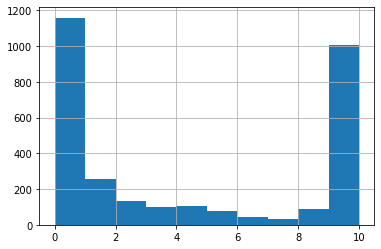

In [ ]:
df["grade"].hist()

In [ ]:
df.isnull().sum()

grade        0
user_name    0
text         0
date         0
dtype: int64

In [ ]:
df["quality"] = df["grade"].map(lambda x: "Positive" if x > 8 else "Negative")

In [ ]:
df["quality"].value_counts()

Negative    1994
Positive    1005
Name: quality, dtype: int64

<AxesSubplot:>

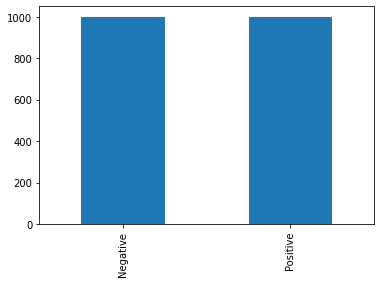

In [ ]:
df["quality"].value_counts().plot.bar()

In [ ]:
Negative = df[df["quality"] == "Negative"].sample(1000)
Positive = df[df["quality"] == "Positive"].sample(1000)

In [ ]:
df = pd.concat([Negative, Positive])
df = df.sample(frac=1).reset_index(drop=True) #Dessordenar las filas

<AxesSubplot:>

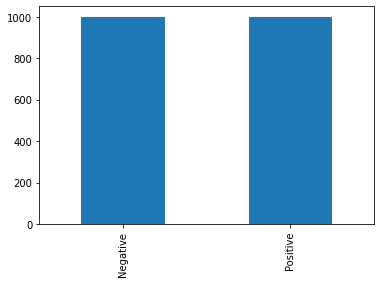

In [ ]:
df['quality'].value_counts().plot.bar()

In [ ]:
#Estudio del lenguaje

import py3langid as langid

df["Language"] = df['text'].apply(lambda x : langid.classify(x)[0])
#función lambda se utliza para crear una nueva columna de marco de datos con etiquetas de idioma

In [ ]:
#Nos muestra las descripciones que no estan en english
df[df["Language"] != "en"][["Language", "text"]]

,Language,text
60,es,Awesome Game.Fantástico para jugar un par de h...
61,es,"Cuando era más niño me encantaba la saga, resp..."
69,es,El mejor Animal Crossing q se ha hecho a la la...
70,es,"No me gustó es horrible, creo que mejor hubier..."
90,es,"Muy divertido , me encanta y si meten alguna a..."
...,...,...
1908,es,"Increíble juego, siento de horas para jugar, y..."
1963,ru,"После любимой игры на 3DS, эта стала ещё удобн..."
1972,fr,"Vraiment génial, c'est New Leaf en mieux ! Hât..."
1976,es,Muy entretenido. Es verdad que tiene carencias...


In [ ]:
dff = df [df["Language"] == "en"][["text", "quality"]]

In [ ]:
dff

,text,quality
0,"I have mixed opinions on this game, which I wi...",Negative
1,"Best animal crossing ever, don’t listen to ba...",Positive
2,I have to rate this game a 0 like many others ...,Negative
3,So... the other players in the island have res...,Negative
4,An excellent addition to the series! New Horiz...,Positive
...,...,...
1995,One island per console is a cheap and pointles...,Negative
1996,An outright fun and amazing game. I feel in lo...,Positive
1997,Super beautiful and wonderful game(for one per...,Negative
1998,Honestly a lovely game. I understand frustrati...,Positive


**PROCESAMIENTO DEL TEXTO**

In [ ]:
#Descargamos las librerias
import nltk
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download([
    "stopwords", #las stopwords
     "names",    #los nombres
     "vader_lexicon",
     "punkt",
     "wordnet" ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Obtener las Stopwords del ingles y los names
stopwords = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()

In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
names

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale',
 'Abra',
 'Acacia',
 'Ada',
 'Adah',
 'Adaline',
 'Adara',
 'Addie',
 'Addis',
 'Adel',
 'Adela',
 'Adelaide',
 'Adele',
 'Adelice',
 'Adelina',
 'Adelind',
 'Adeline',
 'Adella',
 'Adelle',
 'Adena',
 'Adey',
 'Adi',
 'Adiana',
 'Adina',
 'Adora',
 'Adore',
 'Adoree',
 'Adorne',
 'Adrea',
 'Adria',
 'Adriaens',
 'Adrian',
 'Adriana',
 'Adriane',
 'Adrianna',
 'Adrianne',
 'Adrien',
 'Adriena',
 'Adrienne',
 'Aeriel',
 'Aeriela',
 'Aeriell',
 'Ag',
 'Agace',
 'Agata',
 'Agatha',
 'Agathe',
 'Aggi',
 'Aggie',
 'Aggy',
 'Agna',
 'Agnella',
 'Agnes',
 'Agnese',
 'Agnesse',
 'Agneta',
 'Agnola',
 'Agretha',
 'Aida',
 'Aidan',
 'Aigneis',
 'Aila',
 'Aile',
 'Ailee',
 'Aileen',
 'Ailene',
 'Ailey',
 'Aili',
 'Ailina',
 'Ailyn',
 'Aime',
 'Aimee',
 'Aimil',
 'Aina',
 'Aindrea',
 'Ainslee',
 'Ainsley',
 'Ainslie',
 'Ajay',
 'Alaine',
 'Alameda',
 'Alana',
 'Alanah',
 'Alane',
 'Alanna',
 

In [ ]:
def get_tokens(series, reduce):
  #reducer es una función que lematiza o deriva el token


    vocabulary = []
    for comment in series:
        for idx, word in enumerate(nltk.word_tokenize(comment)):
            if not word.isalpha(): continue  #las comas, puntos, signos etc
            if word in stopwords: continue
            if word not in names: word = word.lower()
            vocabulary.append(reduce(word))


    return vocabulary

In [ ]:
lemmatizer = WordNetLemmatizer()
get_tokens(dff["text"][:1], lemmatizer.lemmatize)

['i',
 'mixed',
 'opinion',
 'game',
 'i',
 'list',
 'positive',
 'addition',
 'crafting',
 'nook',
 'Miles',
 'make',
 'incentive',
 'customization',
 'furniture',
 'able',
 'place',
 'item',
 'outside',
 'increase',
 'some',
 'quality',
 'life',
 'improvement',
 'like',
 'stopped',
 'entering',
 'morei',
 'mixed',
 'opinion',
 'game',
 'i',
 'list',
 'positive',
 'addition',
 'crafting',
 'nook',
 'Miles',
 'make',
 'incentive',
 'customization',
 'furniture',
 'able',
 'place',
 'item',
 'outside',
 'increase',
 'some',
 'quality',
 'life',
 'improvement',
 'like',
 'stopped',
 'entering',
 'animation',
 'terraforming',
 'neat',
 'terraforming',
 'control',
 'finnicky',
 'consuming',
 'no',
 'way',
 'craft',
 'animal',
 'repeat',
 'online',
 'terrible',
 'dodo',
 'code',
 'load',
 'time',
 'everywhere',
 'constant',
 'lack',
 'furniture',
 'le',
 'store',
 'upgrade',
 'main',
 'character',
 'past',
 'one',
 'island',
 'per',
 'player',
 'glorified',
 'npc',
 'unable',
 'anything',
 

In [ ]:
#Obtener Vocabulario
vocabulary = get_tokens(dff["text"][:],lemmatizer.lemmatize )

In [ ]:
vocabulary = list(set(vocabulary))

In [ ]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()]) #El método w.lower devuelve una cadena donde todos los caracteres están en minúsculas.

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_text = dff[dff["quality"] == "Positive"]["text"]
negative_text = dff[dff["quality"] == "Negative"]["text"]

positive_tokens = get_tokens(positive_text,lemmatizer.lemmatize)
negative_tokens = get_tokens(negative_text,lemmatizer.lemmatize)

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(positive_tokens)
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(negative_tokens)
)]

In [ ]:
positive_words

['best',
 'crossing',
 'ever',
 'listen',
 'bad',
 'spent',
 'island',
 'make',
 'bad',
 'nintendo',
 'excellent',
 'new',
 'horizon',
 'tried',
 'true',
 'laid',
 'back',
 'task',
 'adding',
 'simple',
 'yet',
 'deep',
 'allowing',
 'apply',
 'island',
 'new',
 'yes',
 'revolves',
 'around',
 'paying',
 'undertake',
 'thatan',
 'excellent',
 'new',
 'horizon',
 'tried',
 'true',
 'laid',
 'back',
 'task',
 'adding',
 'simple',
 'yet',
 'deep',
 'allowing',
 'apply',
 'island',
 'new',
 'yes',
 'revolves',
 'around',
 'paying',
 'undertake',
 'frankly',
 'easy',
 'fishing',
 'catching',
 'bug',
 'well',
 'concept',
 'one',
 'interesting',
 'believe',
 'made',
 'tie',
 'allow',
 'work',
 'together',
 'island',
 'also',
 'limiting',
 'one',
 'cup',
 'tea',
 'designed',
 'enjoyed',
 'real',
 'perhaps',
 'one',
 'real',
 'really',
 'enjoying',
 'play',
 'complained',
 'exist',
 'since',
 'played',
 'animal',
 'one',
 'long',
 'switch',
 'fun',
 'highly',
 'recommend',
 'new',
 'animal',
 '

In [ ]:
negative_words

['mixed',
 'positive',
 'crafting',
 'make',
 'incentive',
 'able',
 'outside',
 'quality',
 'like',
 'stopped',
 'entering',
 'mixed',
 'positive',
 'crafting',
 'make',
 'incentive',
 'able',
 'outside',
 'quality',
 'like',
 'stopped',
 'entering',
 'terraforming',
 'neat',
 'terraforming',
 'finnicky',
 'consuming',
 'animal',
 'terrible',
 'everywhere',
 'constant',
 'le',
 'store',
 'upgrade',
 'main',
 'past',
 'one',
 'per',
 'glorified',
 'npc',
 'unable',
 'first',
 'grating',
 'loading',
 'grating',
 'entertaining',
 'cute',
 'wide',
 'array',
 'alone',
 'knock',
 'without',
 'become',
 'stale',
 'little',
 'remaining',
 'depth',
 'like',
 'many',
 'said',
 'one',
 'per',
 'local',
 'joke',
 'first',
 'get',
 'reward',
 'get',
 'island',
 'local',
 'online',
 'multiplayer',
 'reasoni',
 'like',
 'many',
 'said',
 'one',
 'per',
 'local',
 'joke',
 'first',
 'get',
 'reward',
 'get',
 'island',
 'local',
 'online',
 'multiplayer',
 'patched',
 'give',
 'mentioned',
 'multiple

In [ ]:
from pandas.core import common
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_200_positive = {word for word, count in positive_fd.most_common(200)}
top_200_negative = {word for word, count in negative_fd.most_common(200)}

In [ ]:
import pickle
#Pickle s el proceso de convertir un objeto de Python en un flujo de bytes
#para almacenarlo en un archivo/base de datos
f = open('top_200_positive.pickle', 'wb')
pickle.dump(top_200_positive, f) #Pickle se utliza para almacenar
f.close()

f = open('top_200_negative.pickle', 'wb')
pickle.dump(top_200_negative, f)
f.close()

In [ ]:
top_200_positive

{'accomplishment',
 'acknowledge',
 'alike',
 'anticipated',
 'ashamed',
 'assumed',
 'assuming',
 'basement',
 'belt',
 'blame',
 'blew',
 'bomb',
 'bomber',
 'breathing',
 'breathtaking',
 'brilliantly',
 'bustling',
 'butthurt',
 'canthe',
 'catalogue',
 'charismatic',
 'charm',
 'checking',
 'cherished',
 'childish',
 'chill',
 'collectable',
 'colorful',
 'comfortable',
 'comfy',
 'complains',
 'component',
 'concerning',
 'conventional',
 'counteract',
 'crybaby',
 'custom',
 'customising',
 'customizable',
 'dabbling',
 'definitive',
 'delight',
 'designing',
 'destroy',
 'detail',
 'developing',
 'disagree',
 'diving',
 'docked',
 'dream',
 'effective',
 'enhanced',
 'epic',
 'escape',
 'established',
 'exceed',
 'exceeded',
 'exceptional',
 'executed',
 'expanded',
 'exploring',
 'fault',
 'favourite',
 'fellow',
 'flack',
 'flaw',
 'flawlessly',
 'folk',
 'follows',
 'forth',
 'four',
 'froggy',
 'fur',
 'getaway',
 'gimmicky',
 'goty',
 'grade',
 'grand',
 'gun',
 'handling'

In [ ]:
top_200_negative

{'acceptable',
 'active',
 'actively',
 'advancing',
 'ai',
 'aimlessly',
 'altered',
 'archaic',
 'argue',
 'arrived',
 'artificially',
 'asap',
 'atrocious',
 'attached',
 'avoid',
 'aware',
 'axe',
 'bafflingly',
 'baked',
 'ball',
 'barely',
 'became',
 'bf',
 'blatant',
 'blocked',
 'bothered',
 'botw',
 'boy',
 'caused',
 'cheap',
 'cheaper',
 'clientele',
 'collaborative',
 'comparable',
 'competent',
 'connected',
 'considerably',
 'contributing',
 'controlled',
 'controlling',
 'corporate',
 'correct',
 'counting',
 'crap',
 'crippled',
 'critical',
 'cynical',
 'daughter',
 'deliberately',
 'deliver',
 'demo',
 'depth',
 'designated',
 'devastated',
 'developed',
 'devs',
 'digitally',
 'disgusting',
 'displayed',
 'disrespectful',
 'documented',
 'donate',
 'dramatically',
 'drifting',
 'dull',
 'effectively',
 'entering',
 'entertain',
 'equally',
 'excuse',
 'failed',
 'fails',
 'fell',
 'fight',
 'fighting',
 'figured',
 'fleshed',
 'force',
 'forming',
 'freely',
 'fulle

**NLTK Pretrained Sentiment Analyzer**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Es el proceso de determinar 'computacionalmente' si un comentario es positivo o negativo
sia = SentimentIntensityAnalyzer() #Inizializando Sentiment Intensity Analyzer

In [ ]:
dff["quality"].value_counts()

Negative    972
Positive    893
Name: quality, dtype: int64

In [ ]:
dff["quality_Estimate"] = dff["text"].map(lambda x : max(sia.polarity_scores(x), key=sia.polarity_scores(x).get))

In [ ]:
dff[["text", "quality", "quality_Estimate"]]

,text,quality,quality_Estimate
0,"I have mixed opinions on this game, which I wi...",Negative,neu
1,"Best animal crossing ever, don’t listen to ba...",Positive,neu
2,I have to rate this game a 0 like many others ...,Negative,compound
3,So... the other players in the island have res...,Negative,neu
4,An excellent addition to the series! New Horiz...,Positive,compound
...,...,...,...
1995,One island per console is a cheap and pointles...,Negative,compound
1996,An outright fun and amazing game. I feel in lo...,Positive,compound
1997,Super beautiful and wonderful game(for one per...,Negative,compound
1998,Honestly a lovely game. I understand frustrati...,Positive,compound


**NLTK Naive Bayes Classifier**

In [ ]:
from statistics import mean

def extract_features(text):

    vocabulary = []
    for idx, word in enumerate(nltk.word_tokenize(text)):
        if not word.isalpha(): continue
        if word in stopwords: continue
        word = word.lower()
        word = lemmatizer.lemmatize(word)
        if word in top_200_negative or top_200_positive:
            vocabulary.append(word)

    fd = nltk.FreqDist(vocabulary)

    return fd

In [ ]:
positive_comments = dff[dff["quality"] == "Positive"]["text"].sample(200)
negative_comments = dff[dff["quality"] == "Negative"]["text"].sample(200)

features = [
    (extract_features(review), "La review es positiva")
    for review in positive_comments
]
features.extend([
    (extract_features(review), "La review es negativa")
    for review in negative_comments
])

In [ ]:
features

[(FreqDist({'i': 7, 'game': 7, 'nintendo': 4, 'day': 4, 'like': 4, 'everyone': 3, 'else': 3, 'played': 2, 'since': 2, 'ne': 2, ...}),
  'La review es positiva'),
 (FreqDist({'game': 6, 'i': 5, 'the': 4, 'look': 4, 'love': 2, 'blast': 2, 'playing': 2, 'since': 2, 'got': 2, 'release': 2, ...}),
  'La review es positiva'),
 (FreqDist({'game': 3, 'this': 2, 'animal': 2, 'crossing': 2, 'i': 2, 'fan': 1, 'heard': 1, 'new': 1, 'switch': 1, 'worried': 1, ...}),
  'La review es positiva'),
 (FreqDist({'game': 2, 'i': 1, 'never': 1, 'played': 1, 'animal': 1, 'crossing': 1, 'one': 1, 'blew': 1, 'water': 1, 'all': 1, ...}),
  'La review es positiva'),
 (FreqDist({'it': 3, 'i': 2, 'town': 2, 'would': 2, 'amazing': 1, 'daily': 1, 'time': 1, 'waster': 1, 'enjoy': 1, 'could': 1, ...}),
  'La review es positiva'),
 (FreqDist({'i': 4, 'super': 2, 'not': 1, 'perfect': 1, 'deeper': 1, 'expected': 1, 'fun': 1, 'crafting': 1, 'feel': 1, 'nice': 1, ...}),
  'La review es positiva'),
 (FreqDist({'i': 10, 'gam

In [ ]:
from random import shuffle

train_count = len(features)//2
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])#usamos esta funcion para entrenar el aloritmo de NaiveBayes
classifier.show_most_informative_features()
#Un clasificador basado en el algoritmo Naive Bayes. Se utliza para encontrar la probabilidad de una etiqueta en este caso de las palabras

Most Informative Features
                     buy = 1              La rev : La rev =      8.1 : 1.0
                progress = 1              La rev : La rev =      8.0 : 1.0
                 horizon = 2              La rev : La rev =      6.1 : 1.0
                 another = 1              La rev : La rev =      5.9 : 1.0
                  bought = 1              La rev : La rev =      5.9 : 1.0
                   share = 2              La rev : La rev =      5.9 : 1.0
                nintendo = 1              La rev : La rev =      5.5 : 1.0
                    play = 2              La rev : La rev =      5.2 : 1.0
                  little = 1              La rev : La rev =      4.8 : 1.0
                 perfect = 1              La rev : La rev =      4.8 : 1.0


In [ ]:
nltk.classify.accuracy(classifier, features[train_count:])

0.805

In [ ]:
review = "i love it"
classifier.classify(extract_features(review))

'La review es positiva'

**Scikit-Learn Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import (#Aqu1 se importaron los classifier
    BernoulliNB,
    ComplementNB,
    MultinomialNB
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=30000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [ ]:
train_count = len(features) // 4
shuffle(features)

trained_classifiers = {}

for name, sklearn_classifier in classifiers.items():
     classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
     classifier.train(features[:train_count])
     accuracy = nltk.classify.accuracy(classifier, features[train_count:])
     trained_classifiers[name] = classifier
     print(F"{accuracy:.2%} - {name}")

77.67% - BernoulliNB
85.00% - ComplementNB
84.67% - MultinomialNB
64.67% - KNeighborsClassifier
65.67% - DecisionTreeClassifier
73.00% - RandomForestClassifier
83.67% - LogisticRegression
81.00% - MLPClassifier
74.33% - AdaBoostClassifier


In [ ]:
import pickle
f = open('quality_classifier.pickle', 'wb')
pickle.dump(trained_classifiers["ComplementNB"], f)
f.close()

In [ ]:
f = open('quality_classifier.pickle', 'rb')
deployed_classifier = pickle.load(f)
f.close()

In [ ]:
deployed_classifier.classify(extract_features("it was so horrible i did not like it"))

'La review es negativa'

In [ ]:
deployed_classifier.classify(extract_features("I love this games i will play again"))

'La review es positiva'

In [ ]:
deployed_classifier.classify(extract_features("i did not like it"))

'La review es negativa'

In [ ]:
deployed_classifier.classify(extract_features("i think it was great"))

'La review es positiva'